# DW :  Data Wrangling
By    : Dr Muhammad Asif Assistant\
Email : asifbwp78654@gmail.com\
Date  : 05-02-23

### Cleaning 
### Transformation
### Organizing
### Analysis
### Visualization

# Steps
1. Gathering Data       (kia)
2. Tools to clean data  (kis se clean)
3. How to do, Kaisay    (steps)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Gathering Data       (kia)

In [2]:
df = sns.load_dataset('titanic')

# 2. Assessing the Data

In [3]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# Remove Column

In [4]:
df.drop(columns='deck', inplace=True)

In [5]:
df['age'] = df.age.fillna(value= df ['age'].mean())

In [6]:
df.isnull().sum() / len(df) *100 

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [7]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [8]:
df['embarked'] = df.embarked.fillna(value=df['embarked'].mode()[0])

In [9]:
df['embark_town'] = df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [10]:
df.isnull().sum() / len(df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers Removal
# Visualization wala method

<AxesSubplot:xlabel='sex', ylabel='age'>

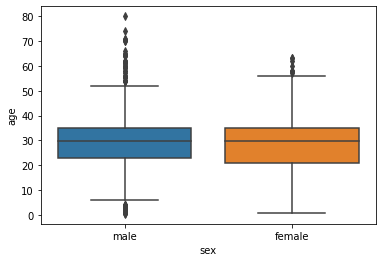

In [11]:
import seaborn as sns
sns.boxplot(data=df, y='age', x='sex')

# IQR Method (Inter Quantile Range Method)

In [12]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
IQR

13.0

# Assignment
# Make Equation for Removal of Quantile with the use of IQR

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

<AxesSubplot:xlabel='age', ylabel='Count'>

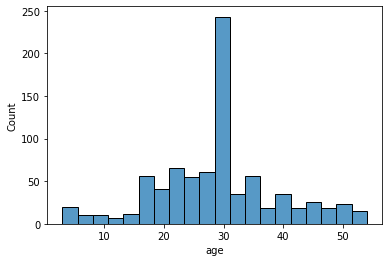

In [14]:
sns.histplot(df['age'])

In [15]:
df.shape

(825, 14)

In [16]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

<AxesSubplot:xlabel='fare', ylabel='Count'>

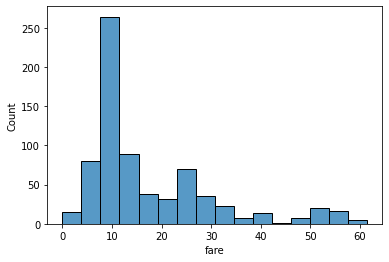

In [17]:
sns.histplot(df['fare'])

In [18]:
df.shape

(718, 14)

# Z Score Method

In [19]:
# from scipy import stats
# import numpy as np
# zscore = np.abs(stats.zscore(df['age']))
# threshold = 3
# df = df[(zscore > threshold).all(axis=0)]

# Finding & Droping Duplicates

In [20]:
df.shape
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [21]:
# Finding Duplicates
df.duplicated().sum()

103

In [22]:
df_duplicates = df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


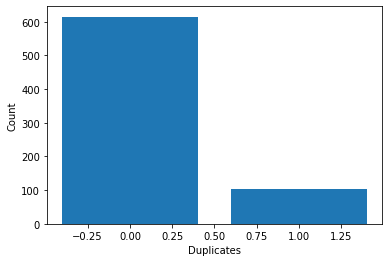

In [23]:
df_duplicates = df.duplicated()
df_duplicates_count = df_duplicates.value_counts()

plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.xlabel('Duplicates')
plt.ylabel('Count')
plt.show()

In [24]:
df_duplicates.shape

(718,)

In [25]:
# Droping Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

# Data Normalization
# To bring data at one scale

In [ ]:
df

In [40]:
# 1. import libraries

# pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2. Data
df

# 3. Select column to normalize 
col_to_normalize = ['age','fare']

# 4. create the scaler function / tool
scaler = MinMaxScaler()

# 5. fit and transform the data on scaler or vice versa
df[col_to_normalize] = scaler.fit_transform(df[col_to_normalize])

# 6. Check the Data   
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True,0


In [ ]:
df.describe()

In [1]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     -------------------------- ----------- 41.0/59.1 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 626.5 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 

In [ ]:
# 1. import libraries

# pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2. Data
df

# 3. Select column to normalize 
col_to_normalize = ['age','fare']

# 4. create the scaler function / tool
scaler = StandardScaler()

# 5. fit and transform the data on scaler or vice versa
df[col_to_normalize] = scaler.fit_transform(df[col_to_normalize])

# 6. Check the Data   
df

In [ ]:
df.describe()

# Assignment 
## What is StandardScaler and its range

x_stand = (x -mean(x)) / std(x)

Wher:

Parameters

x_stand is the standardized variable

x is the origional variable 


mean(x) is the mean of the variable x

std(x) is the standard deviation of variable x

# Log Transformation

In [26]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [27]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
import numpy as np

kashti['age']  = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# Log Transfrom (automatic range of data)

kashti['age'] = np.log(kashti["age"])
kashti['fare']= np.log(kashti["fare"])
kashti.head()

c:\Users\Al HAfiz Enterprises\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


# Assignment
# Log1p in Numpy Documentation

<AxesSubplot:xlabel='sex', ylabel='fare'>

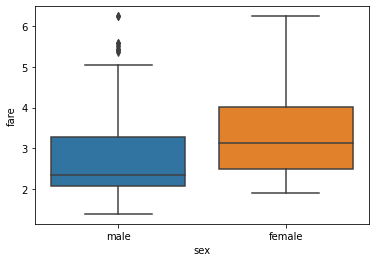

In [29]:
sns.boxplot(data=kashti, x="sex", y="fare")

<AxesSubplot:xlabel='age', ylabel='Count'>

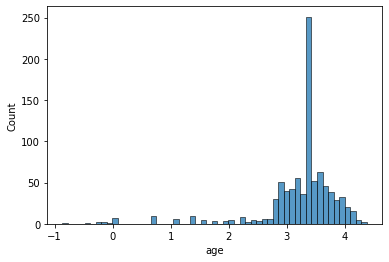

In [30]:
sns.histplot(kashti['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

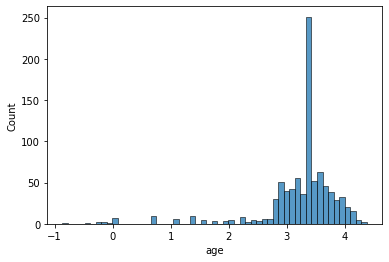

In [31]:
sns.histplot(kashti['age'])

In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# Organizing the Data

In [33]:
df['family_size'] = df['sibsp'] + df['parch']

<AxesSubplot:xlabel='family_size', ylabel='Count'>

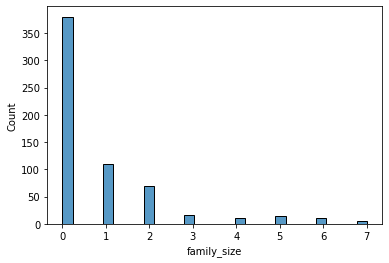

In [34]:
sns.histplot(df['family_size'])

c:\Users\Al HAfiz Enterprises\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Al HAfiz Enterprises\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

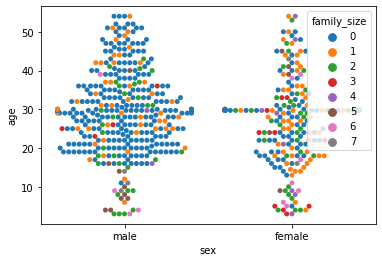

In [35]:
sns.swarmplot(data=df, x="sex", y="age", hue="family_size")

In [36]:
df = df.rename(columns={'survived' : 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

# Sumraize / Organize 
# Make pivot table -> Grouping

In [37]:
table = pd.pivot_table(df, values='fare', index='pclass', columns="survival",aggfunc=np.sum)
table

survival,0,1
pclass,,
1,1354.6707,2150.5295
2,1269.6458,1509.5917
3,3720.1580,1275.7375


# Check Relation

<AxesSubplot:xlabel='fare', ylabel='age'>

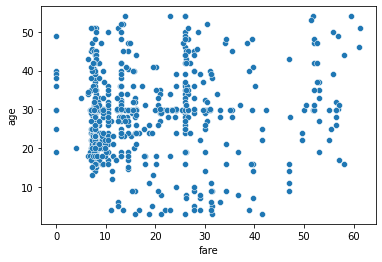

In [38]:
sns.scatterplot(data=df, x='fare', y='age')

In [41]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0


In [42]:
df['family_size'] = df['sibsp'] + df['parch']

In [43]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0


# Saving the wrandles data

In [44]:
df.to_csv("preprocesed_data.csv")